# Fundamentals of Data Analysis
Tasks notebook for Fundamentals of Data Analysis @ GMIT - 2020

Author: Maciej Izydorek (G00387873@gmit.ie) Github: mizydorek

***

#### Task 1 

*Write a Python function called counts that takes a list as
input and returns a dictionary of unique items in the list as keys and the number of times each item appears as values.*

In [1]:
# Version 1.0 
# Really simple approach to solve the Task 1 
# It takes a list, iterate through it and count items in a list and return as a dictionary
def counts():
    # Initial values 
    d = {}
    l = []
    
    l = ['A', 'A', 'B', 'C', 'A']
    
    # iterate through list
    for item in l:
        # check if item is on the list
        if item not in d:
            d[item] = 1
        else:
            d[item] += 1
    print(d)

counts()

{'A': 3, 'B': 1, 'C': 1}


In [2]:
# Version 1.1
# More complex approach to solve the task 1 with nested lists
l = ['A', ['A', 'A', 'B'], 'A', 'B', ['B', 'B']]

# function that counts elements of list and returns as a dictionary 
def counts(l):
    # different approach to count the occurrence by using dict comprehension and built-in count function
    return { i:l.count(i) for i in l }

# Main function that checks if there is a nested list, append all elements to temporary list and applies counts function to it
def reduceall(f, l):
    # temporary list 
    ans = []
    for el in l:
        # checks if element is a list
        if isinstance(el, list):
            # loop through it and append to list
            for subel in el:
                ans.append(subel)
        # if element is not a list, just rewrite to list
        else:
            ans.append(el)
    # applies counts function to list
    ans = f(ans)
    return ans

reduceall(counts, l)

{'A': 4, 'B': 4}

***
#### Task 2

*Write a Python function called dicerolls that simulates
rolling dice. Your function should take two parameters: the number of dice k and
the number of times to roll the dice n. The function should simulate randomly
rolling k dice n times, keeping track of each total face value. It should then return
a dictionary with the number of times each possible total face value occurred.*

In [1]:
# Version 1.0 
# import random library to generate random numbers
# https://docs.python.org/3/library/random.html
import random 

# main function to simulate randomly rolling k dice n times and return a sorted dictionary with the total number of times each possible total face value occurred

def diceroll(k, n):

    d = {}
    l = []

    # iterate n number of times 
    for i in range(n):
        # temp variable 
        num = 0
        # iterate k number of dice
        for j in range(k):
            # generate random number between 1 and 6
            p = random.randint(1,6)
            # sum up result 
            num += p
            
        # append to list 
        l.append(num)
    
    # iterate through a list
    for item in l:
            # check if item is on the list and add one
            if item not in d:
                d[item] = 1
            # if on the list increment by one 
            else:
                d[item] += 1

    # finding on how to sort the dictionaries in python
    # https://stackoverflow.com/questions/9001509/how-can-i-sort-a-dictionary-by-key
    # return sorted dictionary by items
    return dict(sorted(d.items()))

diceroll(2,1000)


{2: 19,
 3: 63,
 4: 87,
 5: 107,
 6: 150,
 7: 152,
 8: 143,
 9: 108,
 10: 86,
 11: 55,
 12: 30}

In [2]:
# Version 1.1
# dict comprehension used to count the occurrence
# https://realpython.com/list-comprehension-python/
import random 

# main function to simulate randomly rolling k dice n times and return a sorted dictionary with the total number of times each possible total face value occurred

def diceroll(k, n):
    l = []
    # iterate n number of times 
    for i in range(n):
        # temp variable 
        totalFace = 0
        # iterate k number of dice
        for j in range(k):
            # generate random number between 1 and 6 and sum up the result 
            totalFace += random.randint(1,6)   
        # append to list 
        l.append(totalFace)
    # different approach to count the occurrence by using dict comprehension and built-in count function
    d = { i:l.count(i) for i in l }
    return dict(sorted(d.items()))

diceroll(2,1000)

{2: 26,
 3: 60,
 4: 81,
 5: 108,
 6: 144,
 7: 171,
 8: 142,
 9: 114,
 10: 78,
 11: 57,
 12: 19}

***
#### Task 3

*The numpy.random.binomial function can be used to
simulate flipping a coin with a 50/50 chance of heads or tails. Interestingly, if a
coin is flipped many times then the number of heads is well approximated by a
bell-shaped curve. For instance, if we flip a coin 100 times in a row the chance of
getting 50 heads is relatively high, the chances of getting 0 or 100 heads is relatively
low, and the chances of getting any other number of heads decreases as you move
away from 50 in either direction towards 0 or 100. Write some python code that
simulates flipping a coin 100 times. Then run this code 1,000 times, keeping track
of the number of heads in each of the 1,000 simulations. Select an appropriate
plot to depict the resulting list of 1,000 numbers, showing that it roughly follows
a bell-shaped curve. You should explain your work in a Markdown cell above the
code.*




#### — Binomial

The binomial distribution is a common discrete probability distribution that there is only one outcome for each independent trial of the same probability of success from two independent values under a given set. The Binomial distribution is a discrete version of normal distribution.

— 

[1] — [Binomial distribution](https://www.investopedia.com/terms/b/binomialdistribution.asp)

[2] — [Numpy: Binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html)


In [3]:
# version 1.0
# Research: There are two ways of testing data for normal distribution either statistical or visual and it's recommended to do both as a statistical tests have the limitations due to sample size (V70 observations).
# https://en.wikipedia.org/wiki/Normality_test
# https://www.graphpad.com/guides/prism/8/statistics/stat_choosing_a_normality_test.htm
# https://www.graphpad.com/support/faq/testing-data-for-normal-distrbution/
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

# import libraries 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# plot settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12,7]

rng = np.random.default_rng(5)

# simulating tossing a coin using numpy binomial function

# Input variables
# n: number of independent experiments in each trial
# p: probability of success for each experiment
# size: number of trials
n, p, size = 100, .5, 1000

# numpy binomial function that runs our Coin tossing simulation
samples = rng.binomial(n, p, size)

#### — *Preview of data*

In [4]:
# preview data of first 100 samples
samples[:100]

array([44, 48, 57, 42, 50, 53, 51, 46, 47, 52, 44, 51, 56, 47, 52, 52, 44,
       42, 44, 49, 50, 46, 49, 46, 56, 51, 51, 57, 53, 53, 46, 57, 57, 41,
       48, 51, 46, 38, 58, 48, 49, 38, 56, 52, 49, 52, 49, 53, 52, 51, 49,
       47, 45, 43, 46, 46, 48, 45, 52, 55, 48, 36, 50, 46, 51, 53, 51, 44,
       55, 49, 50, 45, 51, 51, 44, 43, 61, 39, 54, 49, 54, 49, 49, 49, 56,
       43, 51, 43, 47, 50, 51, 55, 53, 48, 61, 52, 55, 48, 52, 57],
      dtype=int64)

#### — *Histogram*

49.97

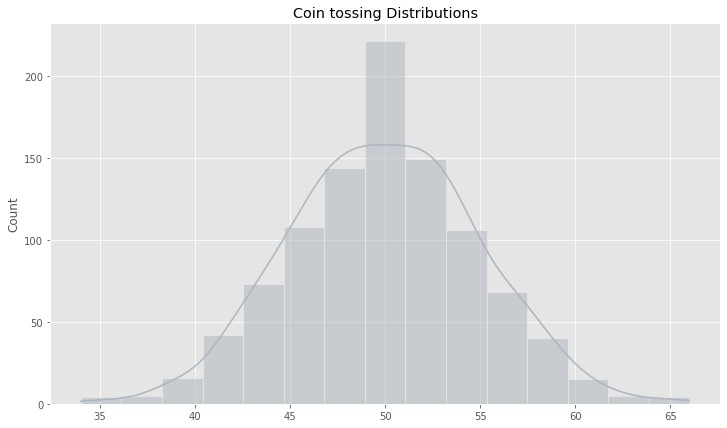

In [5]:
# seaborn distplot function that visually shows the distribution of the variables and the frequency of occurrence per value in the dataset.
sns.histplot(samples, stat="count", bins=15, kde=True, color='#ADB5BD').set_title("Coin tossing Distributions");
# based on 1000 trials we can observed that distribution reminds bell curve with the mean value around 50 
samples.mean()

#### — *Boxplot*

49.97

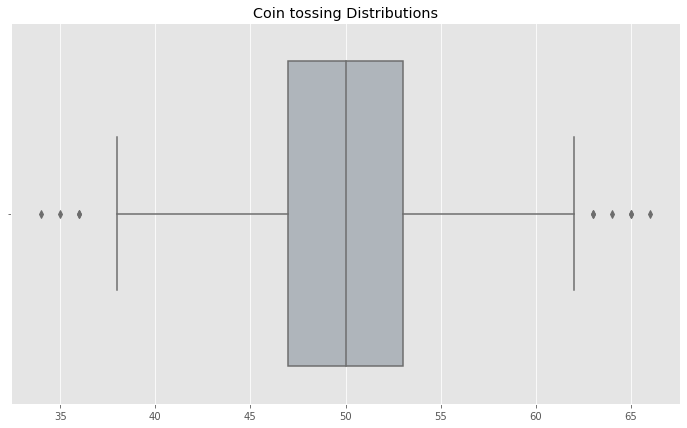

In [6]:
# plotting the boxplot give better overview to visualize distributions of multiple variables at the same time (minimum, first quartile, median, third quartile and maximum.)
sns.boxplot(samples, orient="h", color='#ADB5BD').set_title("Coin tossing Distributions");
# the probability of success
samples.sum() / size

#### — *QQ plot*

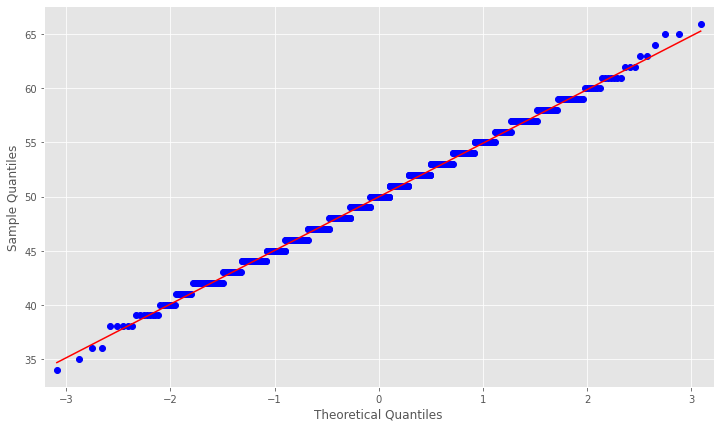

In [7]:
# Quantile-Quantile Plot is another useful plot for checking the distribution of dataset whether follows a normal distribution. Checks the quantiles of our variable with idealized variable of Gaussian distribution and allows to identify the deviation of a distribution. Implementing a QQ plot can be done by using statsmodels package.

# import qqplot from statsmodels
from statsmodels.graphics.gofplots import qqplot

qqplot(samples, line='s');

# Looks more likely that our simulation falls into normal distribution with small deviation. Underrepresentation at both tails cause doubts about normality, in which case statistical test will be performed. 

#### — *Statistical Normality Tests*

In [8]:
# There are many test to evalute normality but four of them are favored: D'Agostino-Pearson, Anderson-Darling, Shapiro-Wilk and Kolmogorov-Smirnov. Each test produces the p-value that determine the result. Either p-value is not significant and fails to reject H0 (p > alpha) or p-value is significant and rejects H0.

# Try to evalute dataset with Shapiro-Wilk normality test. 
# According to ncss Shapiro-Wilk test for normality has been found to be the most powerful test in most situations.
# https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Normality_Tests.pdf

# import Scipy.stats package
import scipy.stats as ss

# sets a treshold for a correctly assumed hypothesis
alpha = 0.05

stat, p = ss.shapiro(samples)
# Evaluation 
if p > alpha:
	print('Samples fall into normal distribution (fail to reject H0)')
else:
	print('Samples do not fall into normal distribution (reject H0)')

# For an assumption of 100 independent coin flip with 50% probability of success and 1000 of trials Shapiro-Wilk statistical test showed that

Samples do not fall into normal distribution (reject H0)


*** 
#### Task 4

*Simpson’s paradox is a well-known statistical paradox where a trend evident in a number of groups reverses when the groups are combined into one big data set. Use numpy to create four data sets, each with an x array and a corresponding y array, to demonstrate Simpson’s paradox. You might create your $x$ arrays using numpy.linspace and create the $y$ array for each $x$ using notation like $y = a * x + b$ where you choose the a and b for each $x$, $y$ pair to demonstrate the paradox. You might see the Wikipedia page for Simpson’s paradox for inspiration.*

#### — *Simpson's paradox*

**Simpson’s paradox**, also called **Yule-Simpson effect**,  is a phenomenon in probability and statistics, and occurs when groups of data show one particular trend, but this trend is reversed when the groups are combined together. Identifying and understanding this conception is crucial for correctly interpreting data.

#### — Datasets

In order to simulate Simpson's paradox four datasets will be created that contains x and y values which corresponds to x and y coordinates on plot. X values will be generated by using NumPy linspace function within given parameters whereas Y values will be generated by  using linear equation: 

$$y = a * x + b$$ 

where $a$ is the slope of the regression line and $b$ is a constant also known $y$ intercept (the value of $y$ when $x$ = 0).

In [13]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

# plot settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [16,12]

# Set your custom color palette
colors = ["#212529", "#495057", "#6C757D", "#ADB5BD", "#CED4DA"]
sns.set_palette(sns.color_palette(colors))
cmap = matplotlib.colors.ListedColormap(colors)

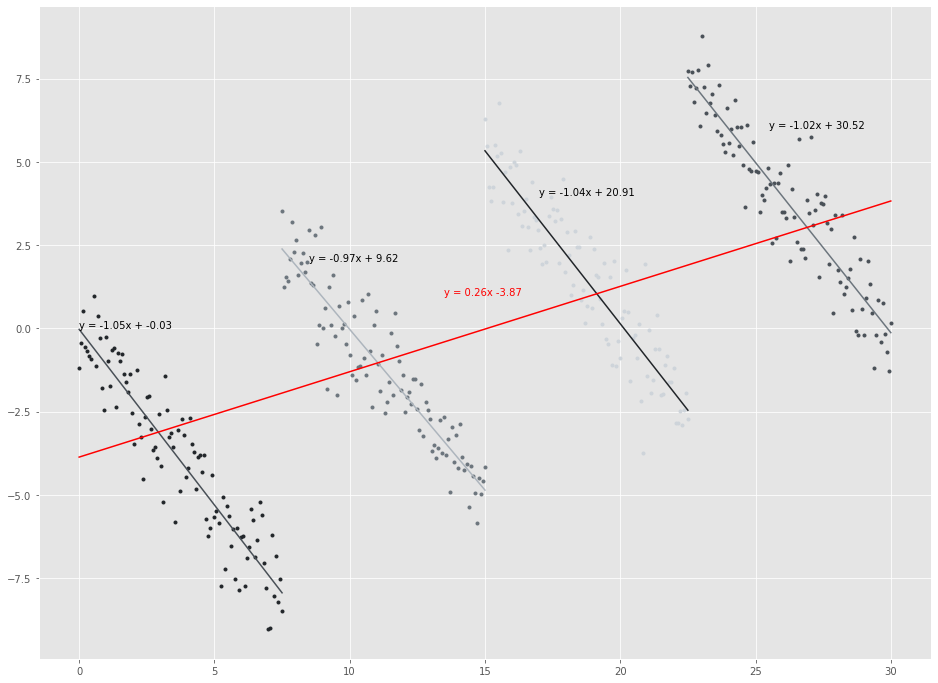

In [50]:
# Create four dummy data sets each with x and corresponding y array using numpy.linspace for x arrays and notation y = a * x + b
# Function that creates n datasets, counts coefficients for them using numpy polyfit function and plot the data.

def simpson(n):
    # create empty arrays to combine all datasets into one large set to simulate the simpson's paradox
    x = np.empty(0)
    y = np.empty(0) 
    # For loop that creates n datasets, counts coefficients for them using numpy polyfit function and plot the data.
    for i in range(n):
        # Create x values using numpy linspace function 
        xi = np.linspace(7.5 * i, 7.5 * i + 7.5, 100)
        # and y values using notation y = a * x + b (in this case b =  10 * i + some noise created using numpy random)
        yi = -1.0 * xi + 10 * i + np.random.normal(0.0, 1.0, len(xi))
        
        # counts coefficients for dataset using numpy polyfit function
        ai, bi = np.polyfit(xi, yi, 1)

        # plot the data
        plt.plot(xi, yi, '.');
        plt.plot(xi, ai * xi + bi, '-' )
        plt.text(7.5 * i + i, 2 * i, 'y = {:.2f}x + {:.2f}'.format(ai, bi))
        
        # append data to master set 
        x = np.append(x, xi)
        y = np.append(y, yi)
        
    # counts coefficients for master dataset 
    a, b = np.polyfit(x, y, 1)
    # and plot the data.
    plt.plot(x, a * x + b, 'r-' ) 
    
    plt.text(13.5, 1, 'y = {:.2f}x {:.2f}'.format(a, b), color='red')

simpson(4)